In [2]:
from sagemaker import get_execution_role

role = get_execution_role()
bucket = 'sagemaker-yourbucket' # Use the name of your s3 bucket here

In [3]:
role

'arn:aws:iam::502041501792:role/service-role/AmazonSageMaker-ExecutionRole-20180927T122556'

In [4]:
%%time
import pickle, gzip, numpy, urllib.request, json

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

CPU times: user 868 ms, sys: 316 ms, total: 1.18 s
Wall time: 2.25 s


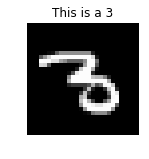

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (2,10)


def show_digit(img, caption='', subplot=None):
    if subplot == None:
        _, (subplot) = plt.subplots(1,1)
    imgr = img.reshape((28,28))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

show_digit(train_set[0][30], 'This is a {}'.format(train_set[1][30]))

In [33]:
from sagemaker import KMeans

data_location = 's3://{}/kmeans_highlevel_example/data'.format(bucket)
output_location = 's3://{}/kmeans_highlevel_example/output'.format(bucket)

print('training data will be uploaded to: {}'.format(data_location))
print('training artifacts will be uploaded to: {}'.format(output_location))

kmeans = KMeans(role=role,
                train_instance_count=2,
                train_instance_type='ml.c4.8xlarge',
                output_path=output_location,
                k=10,
                epochs=100,
                data_location=data_location)

training data will be uploaded to: s3://sagemaker-mcleanbucket/kmeans_highlevel_example/data
training artifacts will be uploaded to: s3://sagemaker-mcleanbucket/kmeans_highlevel_example/output


In [34]:
%%time

kmeans.fit(kmeans.record_set(train_set[0]))

INFO:sagemaker:Creating training-job with name: kmeans-2018-09-27-18-12-44-551


2018-09-27 18:12:44 Starting - Starting the training job...
Launching requested ML instances......
Preparing the instances for training...
2018-09-27 18:14:42 Downloading - Downloading input data...
2018-09-27 18:14:51 Training - Training image download completed. Training in progress..
Docker entrypoint called with argument(s): train
[09/27/2018 18:15:12 INFO 140335603087168] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u'eval_metrics': u'["msd"]', u'_num_kv_servers': u'1', u'mini_batch_size': u'5000', u'half_life_time_size': u'0', u'_num_s

[09/27/2018 18:15:20 INFO 140279420897088] processed a total of 25000 examples
[09/27/2018 18:15:20 INFO 140279420897088] #progress_metric: host=algo-2, completed 24 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Batches Since Last Reset": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Records Since Last Reset": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Total Batches Seen": {"count": 1, "max": 121, "sum": 121.0, "min": 121}, "Total Records Seen": {"count": 1, "max": 605000, "sum": 605000.0, "min": 605000}, "Max Records Seen Between Resets": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Reset Count": {"count": 1, "max": 24, "sum": 24.0, "min": 24}}, "EndTime": 1538072120.930874, "Dimensions": {"Host": "algo-2", "Meta": "training_data_iter", "Operation": "training", "Algorithm": "AWS/KMeansWebscale", "epoch": 23}, "StartTime": 1538072120.701165}

[09/27/2018 18:15:20 INF

[09/27/2018 18:15:30 INFO 140279420897088] processed a total of 25000 examples
[09/27/2018 18:15:30 INFO 140279420897088] #progress_metric: host=algo-2, completed 67 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Batches Since Last Reset": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Records Since Last Reset": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Total Batches Seen": {"count": 1, "max": 336, "sum": 336.0, "min": 336}, "Total Records Seen": {"count": 1, "max": 1680000, "sum": 1680000.0, "min": 1680000}, "Max Records Seen Between Resets": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Reset Count": {"count": 1, "max": 67, "sum": 67.0, "min": 67}}, "EndTime": 1538072130.86691, "Dimensions": {"Host": "algo-2", "Meta": "training_data_iter", "Operation": "training", "Algorithm": "AWS/KMeansWebscale", "epoch": 66}, "StartTime": 1538072130.608986}

[09/27/2018 18:15:30 I

[09/27/2018 18:15:41 INFO 140335603087168] processed a total of 25000 examples
[09/27/2018 18:15:41 INFO 140335603087168] #progress_metric: host=algo-1, completed 87 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Batches Since Last Reset": {"count": 1, "max": 5, "sum": 5.0, "min": 5}, "Number of Records Since Last Reset": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Total Batches Seen": {"count": 1, "max": 436, "sum": 436.0, "min": 436}, "Total Records Seen": {"count": 1, "max": 2180000, "sum": 2180000.0, "min": 2180000}, "Max Records Seen Between Resets": {"count": 1, "max": 25000, "sum": 25000.0, "min": 25000}, "Reset Count": {"count": 1, "max": 87, "sum": 87.0, "min": 87}}, "EndTime": 1538072141.943477, "Dimensions": {"Host": "algo-1", "Meta": "training_data_iter", "Operation": "training", "Algorithm": "AWS/KMeansWebscale", "epoch": 86}, "StartTime": 1538072141.655613}

[09/27/2018 18:15:41 


2018-09-27 18:15:47 Uploading - Uploading generated training model
2018-09-27 18:15:53 Completed - Training job completed
Billable seconds: 141
CPU times: user 8.02 s, sys: 468 ms, total: 8.49 s
Wall time: 3min 52s


In [35]:
%%time

kmeans_predictor = kmeans.deploy(initial_instance_count=1,
                                 instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: kmeans-2018-09-27-18-17-49-885
INFO:sagemaker:Creating endpoint with name kmeans-2018-09-27-18-12-44-551


--------------------------------------------------!CPU times: user 216 ms, sys: 28 ms, total: 244 ms
Wall time: 4min 13s


In [36]:
%%time 

result = kmeans_predictor.predict(valid_set[0][0:100])
clusters = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 311 ms





Cluster 0:


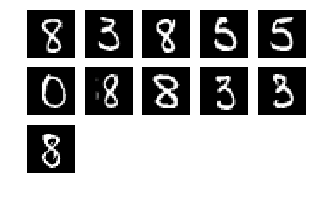




Cluster 1:


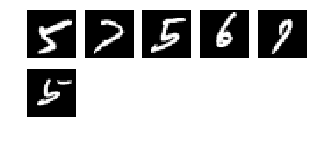




Cluster 2:


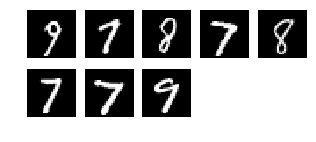




Cluster 3:


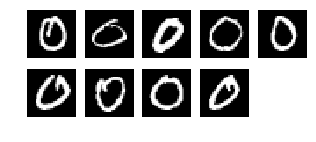




Cluster 4:


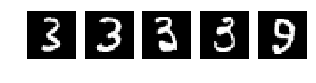




Cluster 5:


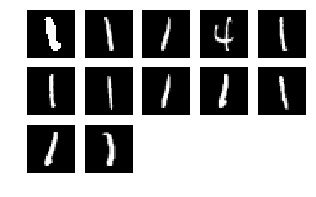




Cluster 6:


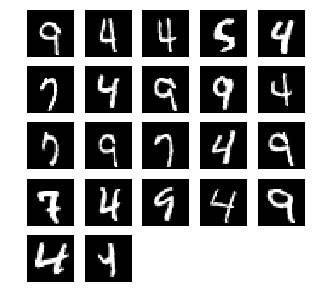




Cluster 7:


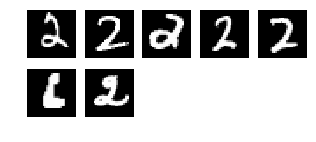




Cluster 8:


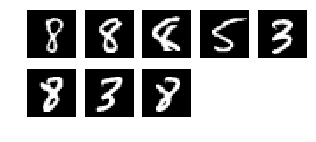




Cluster 9:


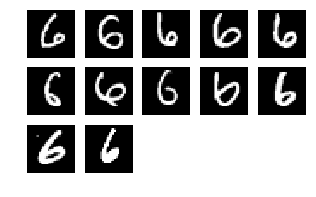

In [37]:
for cluster in range(10):
    print('\n\n\nCluster {}:'.format(int(cluster)))
    digits = [ img for l, img in zip(clusters, valid_set[0]) if int(l) == cluster ]
    height = ((len(digits)-1)//5) + 1
    width = 5
    plt.rcParams["figure.figsize"] = (width,height)
    _, subplots = plt.subplots(height, width)
    subplots = numpy.ndarray.flatten(subplots)
    for subplot, image in zip(subplots, digits):
        show_digit(image, subplot=subplot)
    for subplot in subplots[len(digits):]:
        subplot.axis('off')

    plt.show()

In [38]:
result = kmeans_predictor.predict(valid_set[0][230:231])
print(result)

[label {
  key: "closest_cluster"
  value {
    float32_tensor {
      values: 7.0
    }
  }
}
label {
  key: "distance_to_cluster"
  value {
    float32_tensor {
      values: 6.2980451583862305
    }
  }
}
]


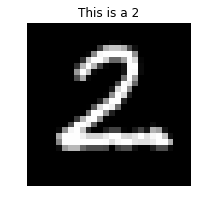

In [39]:
show_digit(valid_set[0][230], 'This is a {}'.format(valid_set[1][230]))